<a href="https://colab.research.google.com/github/Daniel-Benson-Poe/DS-Unit-1-Sprint-2-Statistics/blob/master/db_LS_DS_123_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



# Part 1

In [0]:
# Do usual imports
import scipy.stats as stats
from scipy.stats import ttest_ind, ttest_1samp, ttest_rel, t
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# Create our function
def prob_drunk_given_positive(prob_drunk_prior, false_pos_rate):
  P_drunk = prob_drunk_prior
  P_sober = 1 - P_drunk
  P_pos_given_drunk = 1
  P_pos_given_sober = false_pos_rate
  posterior_probability = (P_pos_given_drunk * P_drunk) / ((P_pos_given_drunk * P_drunk) + (P_pos_given_sober * P_sober))
  return posterior_probability

In [7]:
# Test one with prior equal to 1/1000; probability is about 1.2%
prob_drunk_given_positive(1/1000, 0.08)

0.012357884330202669

In [8]:
# Second test with prior equal to 0.012357884330202669; probability about 13.5%
prob_drunk_given_positive(0.012357884330202669, 0.08)

0.13525210993291495

In [0]:
# Create a function we can use to determine how many tests are required to reach 
# 95% or above probability given our prior and false_positive  rate
def drug_tests_required(prior, false_pos):
  test_number = 0
  test_probability = prior
  while test_probability < 0.95:
    test_probability = prob_drunk_given_positive(test_probability, false_pos)
    test_number += 1
  return test_number

In [12]:
# Let's run this function on our problem above to find out how many tests it 
# would take to reach 95% or above probabliity
drug_tests_required(1/1000, 0.08)

4

In [14]:
# Our function tells us that it would take 4 tests to reach above 95%. Let's 
# test that out the long way to ensure it is correct. 
prior_val = 1/1000
rate = 0.08
probability_list = []
for _ in range(0,4):
  prior_val = prob_drunk_given_positive(prior_val, rate)
  probability_list.append(prior_val)

print(probability_list)

[0.012357884330202669, 0.13525210993291495, 0.6615996951348605, 0.9606895076105054]


In [0]:
# As we can see, that returns us a value above 95% (96% in this case) so we 
# know that our function works.

# Part 2

In [0]:
# It's time to explore scipy and compare Bayesian results to previously
# determined frequentist results
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'
house_columns = ['party', 'handicapped-infants', 'water-project-cost-sharing', 
           'adoption-of-the-budget-resolution', 'physician-fee-freeze', 
           'el-salvador-aid', 'religious-groups-in-schools', 
           'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missile',
           'immigration', 'synfuels-corporation-cutback', 'education-spending',
           'superfund-right-to-sue', 'crime', 'duty-free-exports', 
           'export-administration-act-south-africa']

In [19]:
# Read in data and turn objects into numbers
df = pd.read_csv(url, header=None, names=house_columns, na_values='?')
df = df.replace({'y':1, 'n':0})
df.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [22]:
# Seperate the data into republic and democrat groups
rep = df[df['party']=='republican']
dem = df[df['party']=='democrat']
print(rep.shape)
print(dem.shape)

(168, 17)
(267, 17)


In [0]:
# Create our confidence interval function # Create our confidence interval 
def confidence_interval(data, confidence=0.95):
  """
  Calculate confidence interval using a sample mean from specified data.
  Uses t-distribution and 2-tailed test with a default confidence of 0.95

  Arguments: 
  data - iterable (list or numpy array) of sample observations
  confidence - confidence level for the interval

  Return:
  tuple (mean, lower-bound, upper-bound)
  """
  data = np.array(data) # Sets data into numpy array
  mean = np.nanmean(data) # Creates a mean of the data, ignoring nan values
  n = len(data) # Sets n to the length of the data
  stderr = np.nanstd(data, ddof=1)/np.sqrt(n) # Creates our standard deviation error ignoring nan values
  moe = stderr * stats.t.ppf((1 + confidence) / 2.0, n-1) # Looks up corresponding t-stat
  return (mean, mean-moe, mean+moe)

In [0]:
# Let's also create some functions that can deal with our nan values 
# prior to using the Bayesian approach
def rep_column(column):
  rep_col = rep[column]
  rep_no_nans = rep_col[~np.isnan(rep_col)]
  return rep_no_nans

def dem_column(column):
  dem_col = dem[column]
  dem_no_nans = dem_col[~np.isnan(dem_col)]
  return dem_no_nans

In [31]:
# Now let's look at the handicapped infants columns using frequentist approach
rep_inf_conf = confidence_interval(rep['handicapped-infants'])
rep_inf_conf

(0.18787878787878787, 0.12819979769991746, 0.24755777805765827)

In [0]:
# Let's deal with our nan values now
rep_inf_no_nans = rep_column('handicapped-infants')

In [32]:
# Now look at it using the Bayesian approach:
rep_inf_bayes = stats.bayes_mvs(rep_inf_no_nans, alpha=.95)[0][1]
rep_inf_bayes

(0.12765166444807918, 0.24810591130949655)

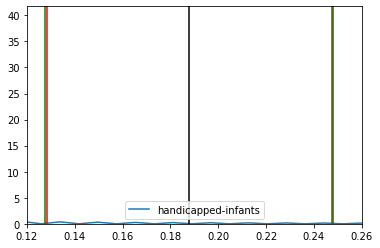

In [35]:
# Now visualize this comparison
sns.kdeplot(rep_inf_no_nans)
plt.axvline(rep_inf_conf[1], color='red')
plt.axvline(rep_inf_conf[2], color='red')
plt.axvline(rep_inf_bayes[0], color='green')
plt.axvline(rep_inf_bayes[1], color='green')
plt.axvline(rep_inf_conf[0], color='k')
plt.xlim(0.12, 0.26); # Zooms in to the frequentist and bayesian lower and upper bounds for easier comparison

In [36]:
# Let's visualize the democrats' support now!
# First the frequentist approach:
dem_inf_conf = confidence_interval(dem['handicapped-infants'])
dem_inf_conf

(0.6046511627906976, 0.5456230466811521, 0.6636792789002431)

In [37]:
# Deal with nulls for the Bayesian approach
dem_inf_no_nans = dem_column('handicapped-infants')
dem_inf_no_nans.isnull().sum()

0

In [38]:
# Bayesian approach:
dem_inf_bayes = stats.bayes_mvs(dem_inf_no_nans, alpha=.95)[0][1]
dem_inf_bayes

(0.5445926997425515, 0.6647096258388437)

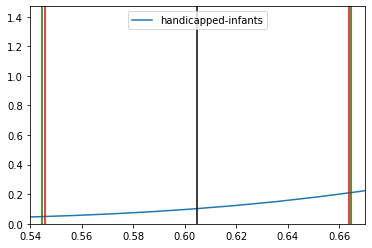

In [53]:
# Now let's visualize that!
sns.kdeplot(dem_inf_no_nans)
plt.axvline(dem_inf_conf[1], color='red')
plt.axvline(dem_inf_conf[2], color='red')
plt.axvline(dem_inf_bayes[0], color='green')
plt.axvline(dem_inf_bayes[1], color='green')
plt.axvline(dem_inf_conf[0], color='k')
plt.xlim(0.54, 0.67); # Zooms in to get a better visualization of the lower bounds, upper bounds, and the mean


# Let's try that with a different dataset now!

In [54]:
# Let's try the titanic dataset
url = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'
df = pd.read_csv(url)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [55]:
# Check for null
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64

In [56]:
# Seperate into different classes
first_class = df[df['Pclass']==1]
second_class = df[df['Pclass']==2]
third_class = df[df['Pclass']==3]
print(first_class)
print(second_class)
print(third_class)

     Survived  Pclass     Sex   Age     Fare     Embarked
1           1       1  female  38.0  71.2833    Cherbourg
3           1       1  female  35.0  53.1000  Southampton
5           0       1    male  54.0  51.8625  Southampton
10          1       1  female  58.0  26.5500  Southampton
20          1       1    male  28.0  35.5000  Southampton
..        ...     ...     ...   ...      ...          ...
694         1       1  female  47.0  52.5542  Southampton
695         0       1    male  33.0   5.0000  Southampton
701         1       1  female  56.0  83.1583    Cherbourg
709         1       1  female  19.0  30.0000  Southampton
710         1       1    male  26.0  30.0000    Cherbourg

[184 rows x 6 columns]
     Survived  Pclass     Sex   Age     Fare     Embarked
8           1       2  female  14.0  30.0708    Cherbourg
14          1       2  female  55.0  16.0000  Southampton
17          0       2    male  35.0  26.0000  Southampton
18          1       2    male  34.0  13.0000  So

In [0]:
# View only the survived column
survived_first_class = first_class['Survived'].values
survived_second_class = second_class['Survived'].values
survived_third_class = third_class['Survived'].values

In [0]:
# Find the confidence interval of each survived class
survived_first_conf = confidence_interval(survived_first_class)
survived_second_conf = confidence_interval(survived_second_class)
survived_third_conf = confidence_interval(survived_third_class)

In [60]:
# Look at the first class confidence interval
survived_first_conf

(0.6521739130434783, 0.5827087674767211, 0.7216390586102355)

In [61]:
# Look at that using Bayesian 
survived_first_bayes = stats.bayes_mvs(survived_first_class, alpha=.95)[0][1]
survived_first_bayes

(0.5827087674767211, 0.7216390586102355)

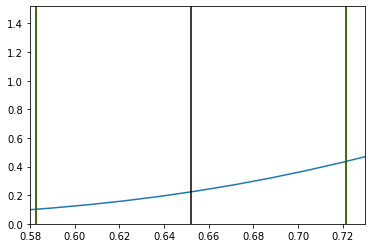

In [63]:
# Look at this graphically
sns.kdeplot(survived_first_class)
plt.axvline(survived_first_conf[1], color='red')
plt.axvline(survived_first_conf[2], color='red')
plt.axvline(survived_first_bayes[0], color='green')
plt.axvline(survived_first_bayes[1], color='green')
plt.axvline(survived_first_conf[0], color='k')
plt.xlim(0.58, 0.73);
# The CI and Bayesian values are exactly the same in this instance
# The null value is not found between the lower and upper bounds so given the 
# data we could safely reject the null hypothesis

In [64]:
# Now for second class
survived_second_conf = confidence_interval(survived_second_class)
survived_second_conf

(0.4797687861271676, 0.4045780048126607, 0.5549595674416745)

In [65]:
# And Bayesian
survived_second_bayes = stats.bayes_mvs(survived_second_class, alpha=.95)[0][1]
survived_second_bayes

(0.4045780048126607, 0.5549595674416745)

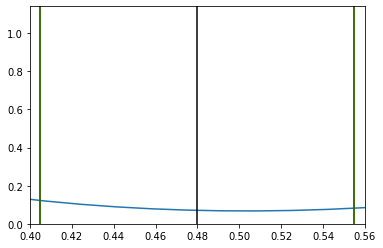

In [68]:
# Now graph it
sns.kdeplot(survived_second_class)
plt.axvline(survived_second_conf[1], color='red')
plt.axvline(survived_second_conf[2], color='red')
plt.axvline(survived_second_bayes[0], color='green')
plt.axvline(survived_second_bayes[1], color='green')
plt.axvline(survived_second_conf[0], color='k');
plt.xlim(.40, .56);
# Null value of 0.5 is found between the lower-bound and upper-bound
# values, so we would be unable to reject the null hypothesis given 
# this data

In [69]:
# Finally third class
survived_third_conf = confidence_interval(survived_third_class)
survived_third_conf

(0.23943661971830985, 0.19483025758052033, 0.2840429818560994)

In [70]:
# Bayesian
survived_third_bayes = stats.bayes_mvs(survived_third_class, alpha=.95)[0][1]
survived_third_bayes

(0.19483025758052033, 0.2840429818560994)

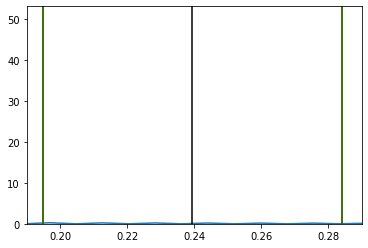

In [72]:
# Compare this graphically
sns.kdeplot(survived_third_class)
plt.axvline(survived_third_conf[1], color='red')
plt.axvline(survived_third_conf[2], color='red')
plt.axvline(survived_third_bayes[0], color='green')
plt.axvline(survived_third_bayes[1], color='green')
plt.axvline(survived_third_conf[0], color='k');
plt.xlim(.19, .29);

# Part 3:

The differences between the frequentist approach and the Bayesian mainly revolve around each one's use of probability. The frequentist approach generally uses samples to determin probability. Bayesian does also use sampling, but it also extends beyond to more general models, including taking prior samples and values into account. 

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

##PyMC3